<a href="https://colab.research.google.com/github/sherif17/Arabic_Dialect_Classification/blob/main/Arabic_Dialect_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import os
import re
import pandas as pd
from google.colab import drive
import nltk

In [ ]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pickle
import argparse

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np
from termcolor import colored

In [ ]:
import sqlite3
import pandas as pd

# **Data Fetching**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/NLP_Final_Project'

In [ ]:
db_file = dataset_path+'/dialects_database.db'

In [ ]:
# connect to the database file
conn = sqlite3.connect(db_file)

table1='id_text'
table2='id_dialect'

# execute a query to join the two tables on the 'id' column
query = f"""
SELECT {table1}.id, {table1}.text, {table2}.dialect
FROM {table1}
JOIN {table2} ON {table1}.id = {table2}.id
"""
raw_df = pd.read_sql_query(query, conn)

# close the database connection
conn.close()
pd.set_option('display.max_colwidth', 100000)
# display the result as a DataFrame
raw_df

,id,text,dialect
0,1009754958479151232,@toha_Altomy @gy_yah قليلين ادب ومنافقين. لو اختهم او قريبتهم تتعاكس تقولي عليهم من نشاط حقوق المرأة من ردة فعلهم.,LY
1,1009794751548313600,@AlmFaisal 😂😂 الليبيين متقلبين!!!\nبس بالنسبة ليا انا ميليشياوي زمان وتوة,LY
2,1019989115490787200,@smsm071990 @ALMOGRBE كل 20 تانيه شاب ليبي بيرتاح لبنت مختلفة ويلاحظ انها غير كل البنات وبيحس كأنه يعرفها من زمان. بعدين يتزوج وحدة منهن وممكن اثنين ولاثلاثة وتنقلب الرومانسية لعياط وشياط وتهزيب\nand they live happily ever after\nذي اند,LY
3,1035479791758135168,@AboryPro @lyranoo85 رانيا عقليتك متخلفة. اولا الانسان يلي يحتاج اهل يخاف منهم علشان يكون محترم هو انسان قليل الادب اصلاً. ثانياً شن ذنب يلي معندهش اب ولا ام ولا خوت ولا خوات؟ يعني اليتيمة متستحقش تتزوج؟ وثالثاً ليش البنت هي بس لازم ادير الف حساب للراجل؟ هي متستحقش يندارلها الف حساب ولا هي عبدة؟,LY
4,1035481122921164800,@lyranoo85 شكلك متعقدة علشان الراجل لي تحبيه ازوج بنت يتيمة ولا بنت معندهش خوت. هدي اعصابك وفكينا من التخلف امتاعك,LY
...,...,...,...
147720,982775354405376000,الناس دي بتنفخ في قربة مقدودة بالدارجي كده البلد دي لو ما الكيزان ديل راحو مافي حياه شريفه في البلد دي لان سبب الفساد والمصائب الموجودة #التطلع_لسودان_افضل,SD
147721,980728852224860160,@Wail_Hamza @amiromer انت عايش وين بره السودان ولا شنو ماشايف البحصل دا,SD
147722,975502734668500992,مااحرم نفسي ميسي حريف ولعاب برضو ..\nمدريدي وافتخر 🇪🇸,SD
147723,980207908641263616,ياخي ديل ماخلو للشيطان وإبليس شي لكن يروحو وين من ربنا ونحن وراك وراك ياكوز ياعفن الأيام معدوده خلاص #تعرف_علي_الكيزان,SD


In [ ]:
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147725 entries, 0 to 147724
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       147725 non-null  int64 
 1   text     147725 non-null  object
 2   dialect  147725 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB
None


In [ ]:
raw_df['dialect'].value_counts()

EG    57636
LY    36499
LB    27617
SD    14434
MA    11539
Name: dialect, dtype: int64

# **EDA**

*   **Check NaNs**



In [ ]:
raw_df.isnull().sum()

id         0
text       0
dialect    0
dtype: int64



*   Check duplicates



In [ ]:
raw_df.duplicated("text").sum()

0

*   **Sampling**




In [ ]:
raw_df.sample(15)

,id,text,dialect
127239,1163946680397512704,@aliali10919 يسافرو فيهن هني احسن يعني؟؟؟؟ او يلبسو فيهن dior و louis vitton,LB
124222,1185913685904113664,مين هيدا اللي عّم يسبح فوق حدا انتبهلو؟ https://t.co/8Tnw6tQmoM,LB
43099,540181788715655168,يعني صفاء مغربي وزوجها بيتسلو بالموت علشان الشهرة بس أكيد ربنا مش حيسبكم تفلتو من عقابُ,MA
3412,1164293631592869888,@Mrs_Gibberish راهو دارو بيهم امبكبكه,LY
108608,1022743689196724224,@adel2607 ما شفت من اي ارض انت لشوف اذا ترابها احمر يا محلى تراباتها 😂😂😂😂😂,LB
27414,1052163017415233536,@MHMAD_FARAG تعال الاسبوع الجاي وتوا تعرفها كلها,LY
71111,1120030030384521216,فى المركز \nشباب موظفيين اداريين \nرحت اخلص حاجة عندهم\n\nواحد ضحك على حاجة قالها وتحد تانى\nلقيت وتحد بيقوله الله على جمال ضحكتك\n\nمقدرتش اسكت\nضحكت وقلت اول مرة اسمع حد رجل يتغزل فى راحل ويقوله جما ضحكتك\n\nانتوا واخدين بعض عن حب\n\nردوا بتلقائية لا دع العادى دلوقتى كلامنا بقى كدة,EG
75208,1175176852832489472,@Marwa_4M تستاهلي عشان قولتلك تعالي بدري 😂,EG
2644,842125009204219904,يا #طرابلس خيرك شن اللي جاك \nيا باهية يا طيبة يا زينة \n ومن اللي نزل دمعتك بكاك😢\nكنتي عروس البحر يا مابهاك \nبلاد الزهر والفل والياسمينا https://t.co/IKO2JaQvsX,LY
76584,993878570622734336,@medogouda50 لا يا ميدو أنا سالت و محدش عارف,EG


*   **Check dataset balancing**

In [ ]:
value_counts=raw_df['dialect'].value_counts()
value_counts

EG    57636
LY    36499
LB    27617
SD    14434
MA    11539
Name: dialect, dtype: int64

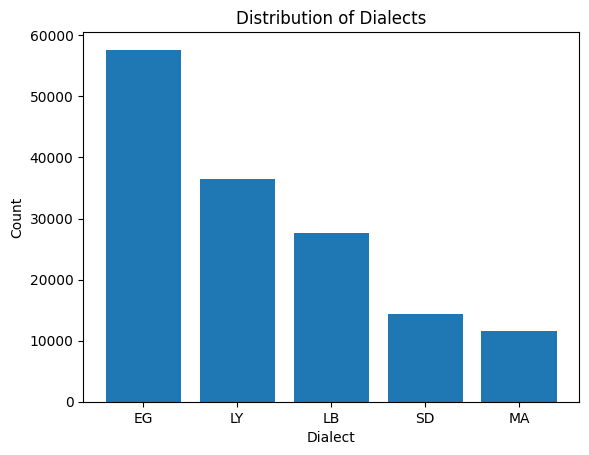

In [ ]:
# Create bar plot
plt.bar(value_counts.index, value_counts.values)
# Add title and labels
plt.title('Distribution of Dialects')
plt.xlabel('Dialect')
plt.ylabel('Count')

# Show plot
plt.show()

# **Data Preprocessing** 

## **Helper functions**

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

raw_text = " في نلعب هيا بنا"
preprocessed_text = remove_stopwords(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before:  في نلعب هيا بنا
After : نلعب


In [ ]:
def remove_usernames(text):
    clean_text = re.sub(r'@\w+', '', text)
    return clean_text

raw_text = "@baDYHezsQfLVRtQ مسا مسا اهو انت 😂😂😂"
preprocessed_text = remove_usernames(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: @baDYHezsQfLVRtQ مسا مسا اهو انت 😂😂😂
After :  مسا مسا اهو انت 😂😂😂


In [ ]:
def remove_emojis(text):
    clean_text = re.sub(r'[^\w\s#@/:%.,_-]', '', text)
    return clean_text

raw_text = "@baDYHezsQfLVRtQ مسا مسا اهو انت 😂😂😂"
preprocessed_text = remove_emojis(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: @baDYHezsQfLVRtQ مسا مسا اهو انت 😂😂😂
After : @baDYHezsQfLVRtQ مسا مسا اهو انت 


In [ ]:
def remove_numbers(text):
    clean_text = re.sub(r'\d+', '', text)
    return clean_text

raw_text = "٣٣ هاي"
preprocessed_text = remove_numbers(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: ٣٣ هاي
After :  هاي


In [ ]:
def remove_links(text):
  URL_REGEXES = [
    r"(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)",
    r"@(https?|ftp)://(-\.)?([^\s/?\.#-]+\.?)+(/[^\s]*)?$@iS",
    r"http[s]?://[a-zA-Z0-9_\-./~\?=%&]+",
    r"www[a-zA-Z0-9_\-?=%&/.~]+",
    r"[a-zA-Z]+\.com",
    r"(?=http)[^\s]+",
    r"(?=www)[^\s]+",
    r"://",
  ]
  
  for reg in URL_REGEXES:
    text = re.sub(reg, '', text)
  return text

raw_text = "النكتة حلوة، بس هو مكانش عامل فولو ليه أصلا https://t.co/6lmlpseLk4	www.google.com"
preprocessed_text = remove_links(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: النكتة حلوة، بس هو مكانش عامل فولو ليه أصلا https://t.co/6lmlpseLk4	www.google.com
After : النكتة حلوة، بس هو مكانش عامل فولو ليه أصلا 	


In [ ]:
def remove_english(text):
    english_pattern = re.compile(r'[a-zA-Z]+')
    cleaned_text = re.sub(english_pattern, '', text)
    return cleaned_text

raw_text = "LeloSherif وانتي طيبة ي احلى لارا يا ملكة تويتر ❤️❤️\nيارب انا وانتي حبيبتي الله يسعدك ❤️❤️😘	"
preprocessed_text = remove_english(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: LeloSherif وانتي طيبة ي احلى لارا يا ملكة تويتر ❤️❤️
يارب انا وانتي حبيبتي الله يسعدك ❤️❤️😘	
After :  وانتي طيبة ي احلى لارا يا ملكة تويتر ❤️❤️
يارب انا وانتي حبيبتي الله يسعدك ❤️❤️😘	


In [ ]:
def remove_diacritics(text):
    arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                            ـ    | # Tatwil/Kashida
                         """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)

raw_text = "الــبسملة : ( بِسْمِ اللَّـهِ الرَّحْمَـٰنِ الرَّحِيمِ )"
preprocessed_text = remove_diacritics(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: الــبسملة : ( بِسْمِ اللَّـهِ الرَّحْمَـٰنِ الرَّحِيمِ )
After : البسملة : ( بسم الله الرحمٰن الرحيم )


In [ ]:
def normalize_chars(text):
    preprocessed_text = re.sub("[إأآا]", "ا", text)
    preprocessed_text = re.sub("ى", "ي", preprocessed_text)
    preprocessed_text = re.sub("ؤ", "ء", preprocessed_text)
    preprocessed_text = re.sub("ئ", "ء", preprocessed_text)
    preprocessed_text = re.sub("ة", "ه", preprocessed_text)
    preprocessed_text = re.sub("گ", "ك", preprocessed_text)
    preprocessed_text = re.sub("ڤ", "ف", preprocessed_text)
    preprocessed_text = re.sub("چ", "ج", preprocessed_text)
    preprocessed_text = re.sub("ژ", "ز", preprocessed_text)
    preprocessed_text = re.sub("پ", "ب", preprocessed_text)
    return preprocessed_text

raw_text = "ى آ ؤ ئ هيا"
preprocessed_text = normalize_chars(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: ى آ ؤ ئ هيا
After : ي ا ء ء هيا


In [ ]:
def remove_special_chars(text):
  '''
   The regular expression r'[^\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\d\s]+'
    matches any characters that are not in the specified range of 
    Arabic Unicode characters (\u0600-\u06FF, \u0750-\u077F, and \u08A0-\u08FF),
    digits (\d), or whitespace (\s).
  '''
  special_chars_pattern = re.compile(r'[^\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\d# ]+')

  cleaned_text = re.sub(special_chars_pattern, ' ', text)
  return cleaned_text 

raw_text = " مرحيا ðð·"
preprocessed_text = remove_special_chars(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before:  مرحيا ðð·
After :  مرحيا  


In [ ]:
def remove_punctuation(text):
  pun = r"([!\"#\$%\'\(\)\*\+,\.:;\-<=·>?@\[\\\]\^_ـ`{\|}~—٪’،؟`୍“؛”ۚ【»؛\s+«–…‘])"
  cleaned_text = re.sub(pun, ' ', text)
  return cleaned_text 

# raw_text = "نسيت خبركم: طار #السبهان_هي"
raw_text = "   #تبيلس \n #الوكر_بيشجع_الفولورز\n #المواكيس_وفولورز_ببلاش\n#زعيم_تويتر_هيزودك"
preprocessed_text = remove_punctuation(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')


Before:    #تبيلس 
 #الوكر_بيشجع_الفولورز
 #المواكيس_وفولورز_ببلاش
#زعيم_تويتر_هيزودك
After :     تبيلس    الوكر بيشجع الفولورز   المواكيس وفولورز ببلاش  زعيم تويتر هيزودك


In [ ]:
def remove_extra_whitespaces(text):
    clean_text = re.sub(r'\s+', ' ', text)
    return clean_text.strip()

raw_text = "السلام عليكم    علـيـكم   "
preprocessed_text = remove_extra_whitespaces(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before: السلام عليكم    علـيـكم   
After : السلام عليكم علـيـكم


In [ ]:
def remove_repeated_chars(text):
    pattern = re.compile(r"(.)\1{2,}")
    clean_text = pattern.sub(r"\1\1", text)
    return clean_text

raw_text = " اللللي بتااااااااااااااع  اللله اناااااااا "
preprocessed_text = remove_repeated_chars(raw_text)

print(f'Before: {raw_text}')
print(f'After : {preprocessed_text}')

Before:  اللللي بتااااااااااااااع  اللله اناااااااا 
After :  اللي بتااع  الله اناا 


## **Apply Preprocessing steps:**

1. stop words 'include tashkeel and diacritics'

2. emojis 'before numbers', numbers, usernames : 'independent'

3. urls : 'dependent on english chars


4. english words, remove_diacritics, tashkeel

5. remove_special_chars, punctuation

6. whitespaces -> last thing

In [ ]:
def remove_all(text):

  #stop_words
  text = remove_stopwords(text)

  #user_names
  text = remove_usernames(text)

  #emojies
  text = remove_emojis(text)
  
  #numbers
  text = remove_numbers(text)

  #links
  text = remove_links(text)

  # English
  text= remove_english(text)

  #tashkel 
  text=remove_diacritics(text)

  #normalizeChars
  text=normalize_chars(text)

  # special chars
  text=remove_special_chars(text)

  # punctuation
  text=remove_punctuation(text)

  #white_space
  text = remove_extra_whitespaces(text)

  #repeated charachters
  text = remove_repeated_chars(text)
 
  return text

In [ ]:
df = raw_df.copy()
df=df.drop('id',axis=1)

In [ ]:
df['text']=df['text'].apply(remove_all)

In [ ]:
df.sample(50)

,text,dialect
87572,يامءدب انا عايشه في مصر مش حينفع اشتمك للاسف حاكتفي ببلوك رقيق,EG
108131,رحت محل الفراريج قلتلو بدي فروج مشوي قلي شفت مبارح الجمهور الياباني نضف الدني رغم الخساره بالثواني الاخيره تاثرت كتير ومسكت دموعي واخدت الفروج توم زياده,LB
67471,مش بصدق الناس ده اوي مجدي لغتهم شء المبالغه تحس عايزين يوصلوا رساله يقصدونها يارب اكون غلطانه,EG
127681,يالطيف ياالله الطف بعبادك وشفيهم ياكريم يامعين ياالله,LB
108626,بتطلع قلبي بدرجه وحده ادفشك وتتدعبل بتسقط درجه اوعك تنسي,LB
110974,ممكن اعرف التظاهر ضد مين,LB
27072,جاوبت ربي يوفقك ويفرحك ويرزقك خيره وديري مشروع تجميل او اي مشروع انت تبيه يارب,LY
84712,جيمي اسف وبيحبك عارفه مرجعتيش وجيمي عمل نفسه حاجه,EG
74697,الزمن ساعتين وحبه عشان تستلم العربيه التوكيل والمهندس بيقولي دقايق بس,EG
39429,اسماعيل سمع سميتو طل او مشي قول سلام هه,MA


##**Label Encoding**

In [ ]:
encoding = preprocessing.LabelEncoder()

# using fit transform on the data
y = encoding.fit_transform(df.dialect.values)

# replace dialec column with the encoded
df['dialect'] = y

In [ ]:
df.sample(50)

,text,dialect
31703,اكيد مااركب السياره وتعودت لسلامتي,2
79221,ازيك عبد الرحمن مالك ولدي قول اللي انت عوز تقوله انا نفسي متقبله منك اي حاجه اكتب واكتب كمان وكمان ربنا يقدرك ويعفي عنك ويشفيك اوعي تضعف والله ياريت اقدر كنت جيت زورتك اجمد يابطل وان شاء الله خير اللي يجيبوا ربنا خير,0
128328,ازا مطوله وبكل وقاحه كاتبينها,1
74160,والله حد عارف ايه,0
146003,كلو خير احتمال الله خاتي ليك الاحسن وبضيق عشان تفرج النهايه,4
19364,صور ناس يبتسمو عندهمش سنون زي بيبي مثلا,2
123160,طب انا كوحده معي فوبيا الابر المستشفي كلها بتعرف اني رح اخد ابره ويسترجي حدن يحكيلي كلمه عشان حط الابره بنيعو,1
17423,اه طفيت الضي,2
122333,تحياتنا للزعماء اللبنانيه,1
138323,وانت مالك متعصبه كدا روقي المنقه شويه,4


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147725 entries, 0 to 147724
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     147725 non-null  object
 1   dialect  147725 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ MB
None


# **Model Training**

## **Machine Learning**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Assigning the features and lables from the dataframe
features = df.text.values.astype(str)
lables = df.dialect.values.astype('int')

### **Spliting data** 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        features, lables, random_state=42, test_size=0.2, shuffle=True)

### **Apply TF-IDF** 

In [ ]:
# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(
    min_df=0.0001, 
    max_df=0.95, 
    ngram_range=(1, 4),
    max_features= 2000,
    analyzer='word')

### **SVC**

In [ ]:
# Create a SVC object with class weighting and hyperparameter tuning
svm_clf = SVC(C=1, gamma='scale', kernel='rbf', class_weight='balanced')
# svm_clf = SVC(C=1, degree = 3, gamma='auto', kernel='linear', class_weight='balanced')


pipe_tfidf = Pipeline([('tfidf', tfidf_vectorizer),
                  ('svm_clf', svm_clf)], verbose=True)

# # Train the SVM model on the training data
pipe_tfidf.fit(X_train, y_train)

In [ ]:
# Predict the labels of the testing data
# y_pred = pipe_tfidf.predict(X_test)
y_pred = svm_clf.predict(X_test)


# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.49      0.62      5779
           1       0.66      0.46      0.54      2790
           2       0.48      0.35      0.40      3549
           3       0.16      0.71      0.25      1169
           4       0.40      0.40      0.40      1486

    accuracy                           0.46     14773
   macro avg       0.50      0.48      0.44     14773
weighted avg       0.62      0.46      0.50     14773



### **Random Forest**

In [ ]:
rf_clf = RandomForestClassifier(criterion='gini',
                                n_estimators=15,
                                min_samples_split=10,
                                min_samples_leaf=1,
                                max_features='auto',
                                random_state=1,
                                n_jobs=-1,
                                verbose=2)

In [ ]:
pipe_rf = Pipeline([('tfidf', tfidf_vectorizer),
                  ('clf', rf_clf)], verbose=True)
pipe_rf.fit(X_train, y_train)

[Pipeline] ............. (step 1 of 2) Processing tfidf, total=  21.6s
building tree 1 of 15building tree 2 of 15



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15
[Pipeline] ............... (step 2 of 2) Processing clf, total=  27.1s


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   27.1s finished


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.95, max_features=2000, min_df=0.0001,
                                 ngram_range=(1, 4))),
                ('clf',
                 RandomForestClassifier(max_features='auto',
                                        min_samples_split=10, n_estimators=15,
                                        n_jobs=-1, random_state=1,
                                        verbose=2))],
         verbose=True)

In [ ]:
y_pred_rf = pipe_rf.predict(X_test)
# Evaluating the model
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred_rf) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, y_pred_rf)}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Test Set Accuracy: 69.82907429345066 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.73      0.84      0.78     11484
           1       0.74      0.70      0.72      5578
           2       0.61      0.67      0.64      7268
           3       0.74      0.47      0.57      2283
           4       0.69      0.39      0.50      2932

    accuracy                           0.70     29545
   macro avg       0.70      0.61      0.64     29545
weighted avg       0.70      0.70      0.69     29545



[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:    0.4s finished


In [ ]:
# Saving ML Model
with open(dataset_path+'/Models/RFmodel.pkl', 'wb') as file:
    pickle.dump(y_pred_rf, file)


### **XGBoost**


In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators=15,
                            min_samples_split=10)

In [ ]:
pipe_xgb = Pipeline([('tfidf', tfidf_vectorizer),
                  ('clf', xgb_clf)], verbose=True)
pipe_xgb.fit(X_train, y_train)

[Pipeline] ............. (step 1 of 2) Processing tfidf, total=  14.7s
[17:39:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[Pipeline] ............... (step 2 of 2) Processing clf, total= 3.1min


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(analyzer='char_wb', max_df=0.3, min_df=0.01,
                                 ngram_range=(3, 5))),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow...ce_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, min_samples_split=10,
                               missing=nan, monotone_constraints=None,
                               n_estimators=15, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))],
         verbose=True)

In [ ]:
y_pred_xgb = pipe_xgb.predict(X_test)
# Evaluating the model
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100} %\n\n")
print(f"Classification Report : \n\n{classification_report(y_test, y_pred_xgb)}")

Test Set Accuracy: 64.1981994178569 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      5779
           1       0.87      0.54      0.67      2790
           2       0.47      0.74      0.58      3549
           3       0.88      0.32      0.47      1169
           4       0.77      0.30      0.43      1486

    accuracy                           0.64     14773
   macro avg       0.74      0.54      0.58     14773
weighted avg       0.70      0.64      0.63     14773



## **Deep Learning**

In [ ]:
# Preparing the dataset
lables = pd.get_dummies(df['dialect']).values  # One-hot encoding the lables

### **Spliting data**

In [ ]:
X_train, X_test, y_train , y_test = train_test_split(df['text'],lables, test_size = 0.20, random_state = 42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(118180,) (29545,)
(118180, 5) (29545, 5)


### **Tokenizing**

In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
print('Found %s unique word.' % len(word_index))


Found 187698 unique word.


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

187699

In [ ]:
embedding_dim = 128
max_length = 250

# Truncate and padding options
trunc_type = 'post'
padding_type = 'post'

In [ ]:
train_seq = tokenizer.texts_to_sequences(X_train.astype(str))
train_padded = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

validation_seq = tokenizer.texts_to_sequences(X_test.astype(str))
validation_padded = pad_sequences(validation_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print('Shape of train_padded:', train_padded.shape)
print('Shape of validation_padded:', validation_padded.shape)


Shape of train_padded: (118180, 250)
Shape of validation_padded: (29545, 250)


In [ ]:
sentence_len = [len(sentence) for sentence in train_seq]

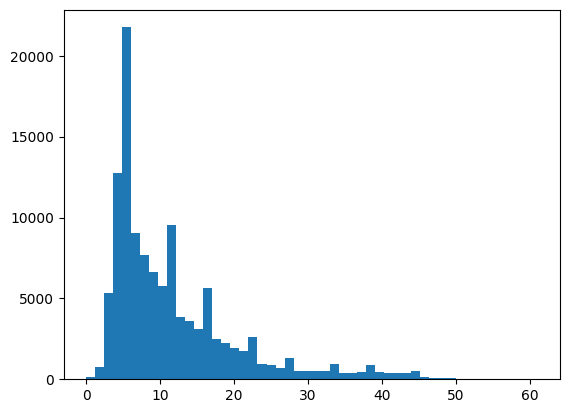

In [ ]:
plt.hist(sentence_len, bins=50)
plt.show()

In [ ]:
# saving tokenzer
with open(dataset_path+'/final_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


### **LSTM**

In [ ]:
RNN_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5,activation='softmax')
])


In [ ]:
RNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 250, 128)          25772928  
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 5)                 325       
                                                                 
Total params: 25,880,325
Trainable params: 25,880,325
Non-trainable params: 0
_________________________________________________________________


In [ ]:
RNN_model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['categorical_accuracy'])
epochs = 10
batch_size = 128

In [ ]:
class_weights = compute_sample_weight(class_weight='balanced', y=y_train)
class_weights = dict(enumerate(np.squeeze(class_weights)))


In [ ]:
history = RNN_model.fit(train_padded, y_train, shuffle=True ,
                    epochs=epochs,
                    batch_size=batch_size, 
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_categorical_accuracy', mode='max', patience=5, verbose=1 ,  restore_best_weights=True,)],
                    class_weight=class_weights)

Epoch 1/10
935/935 [==============================] - 105s 107ms/step - loss: 0.2675 - categorical_accuracy: 0.7416 - val_loss: 0.5253 - val_categorical_accuracy: 0.8196
Epoch 2/10
935/935 [==============================] - 42s 45ms/step - loss: 0.0983 - categorical_accuracy: 0.9104 - val_loss: 0.5799 - val_categorical_accuracy: 0.8111
Epoch 3/10
935/935 [==============================] - 33s 36ms/step - loss: 0.0442 - categorical_accuracy: 0.9616 - val_loss: 0.6501 - val_categorical_accuracy: 0.8081
Epoch 4/10
935/935 [==============================] - 31s 33ms/step - loss: 0.0262 - categorical_accuracy: 0.9769 - val_loss: 0.7555 - val_categorical_accuracy: 0.7996
Epoch 5/10
935/935 [==============================] - 31s 33ms/step - loss: 0.0185 - categorical_accuracy: 0.9834 - val_loss: 0.8401 - val_categorical_accuracy: 0.7985
Epoch 6/10
935/935 [==============================] - 29s 32ms/step - loss: 0.0136 - categorical_accuracy: 0.9874 - val_loss: 0.9753 - val_categorical_accurac

In [ ]:
pred_rnn = RNN_model.predict(validation_padded)

462/462 [==============================] - 4s 7ms/step


In [ ]:
print(pred_rnn[0])

[8.7226763e-05 1.0355205e-04 7.1935874e-04 9.9900562e-01 8.4371037e-05]


In [ ]:
import numpy as np
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred_rnn, axis=1)  ))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5779
           1       0.87      0.83      0.85      2790
           2       0.78      0.83      0.80      3549
           3       0.68      0.75      0.71      1169
           4       0.92      0.50      0.65      1486

    accuracy                           0.82     14773
   macro avg       0.82      0.76      0.78     14773
weighted avg       0.83      0.82      0.82     14773



In [ ]:
# Save model to drive
RNN_model.save(dataset_path +'/Models/final_lstm_model.h5')

# **Model Testing**

In [ ]:
# Define the label dictionary
label_dict = {0:'EG', 1:'LB', 2:'LY', 3:'MA', 4:'SD'}
# Loading the model
RNN_model = tf.keras.models.load_model(dataset_path +'/Models/final_lstm_model.h5')


In [ ]:
# Define the maximum sequence length
MAX_SEQUENCE_LENGTH = 250

# Define a list of texts to predict
texts = ["- تي وين مختفي انت ؟\n= لا والله امغير كل مانحقك نقول زبري ونغير طريقي", "@a_beer_farah أنو اشتقتلك انا اي 😉", "تي إي داتا مسحت الاكونت بتاعها نكلم مين بقا في النت السلحفاه ده؟"]
true_labels = [2, 1, 0]  # corresponding true labels for the texts

# Preprocess each text and predict the class label
for i, text in enumerate(texts):
    text = remove_all(text)
    text = np.array([text])
    text = tokenizer.texts_to_sequences(text)
    text = pad_sequences(text, maxlen=MAX_SEQUENCE_LENGTH, padding=padding_type, truncating=trunc_type)

    # Predict the class label and print the true and predicted labels
    prediction = RNN_model.predict(text)
    class_label = np.argmax(prediction, axis=1)
    true_label = true_labels[i]

    if class_label == true_label:
        label_color = 'green'
    else:
        label_color = 'red'

    true_label_name = label_dict[true_label]
    predicted_label_name = label_dict[class_label[0]]

    print(f"Text {i+1}: {texts[i]}")
    print(f"True Label: {colored(true_label_name, label_color)}")
    print(f"Predicted Label: {colored(predicted_label_name, label_color)}\n")


1/1 [==============================] - 0s 51ms/step
Text 1: - تي وين مختفي انت ؟
= لا والله امغير كل مانحقك نقول زبري ونغير طريقي
True Label: LY
Predicted Label: LY

1/1 [==============================] - 0s 44ms/step
Text 2: @a_beer_farah أنو اشتقتلك انا اي 😉
True Label: LB
Predicted Label: LB

1/1 [==============================] - 0s 48ms/step
Text 3: تي إي داتا مسحت الاكونت بتاعها نكلم مين بقا في النت السلحفاه ده؟
True Label: EG
Predicted Label: EG

